# **Dendogram**

#### สามารถแบ่งได้ 2 แบบ คือ

- #### **edge list** → 2 columns, 1 row 

- #### **nested data frame** → 1 row เป็นข้อมูลจากรากแล้วแยกออกมา

## **Dendrogram from edge list**

- #### เปลี่ยนจากข้อมูลเป็นกราฟโดยใช้ฟังก์ชั่น **graph_from_data_frame()**

- #### สร้าง layout โดย **layout = 'dendrogram'**

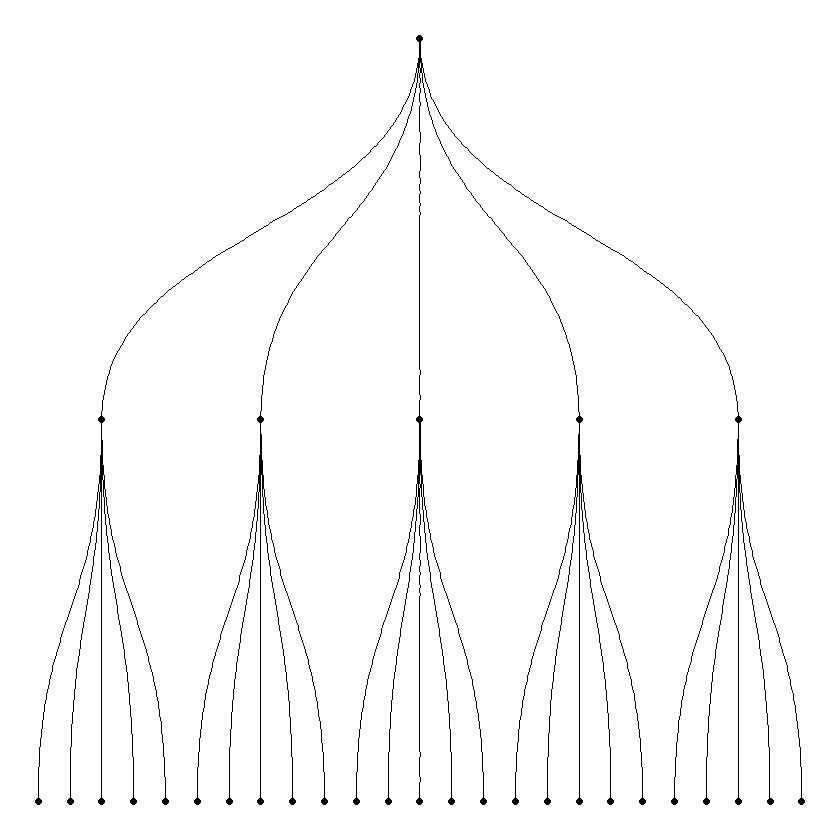

In [14]:
# libraries
library(ggraph)
library(igraph)
library(tidyverse)
 
# create an edge list data frame giving the hierarchical structure of your individuals
d1 <- data.frame(from="origin", to=paste("group", seq(1,5), sep=""))
d2 <- data.frame(from=rep(d1$to, each=5), to=paste("subgroup", seq(1,25), sep="_"))
edges <- rbind(d1, d2)
 
# Create a graph object 
mygraph <- graph_from_data_frame( edges )
 
# Basic tree
ggraph(mygraph, layout = 'dendrogram', circular = FALSE) + 
  geom_edge_diagonal() +
  geom_node_point() +
  theme_void()

## **Dendrogram from a nested dataframe**

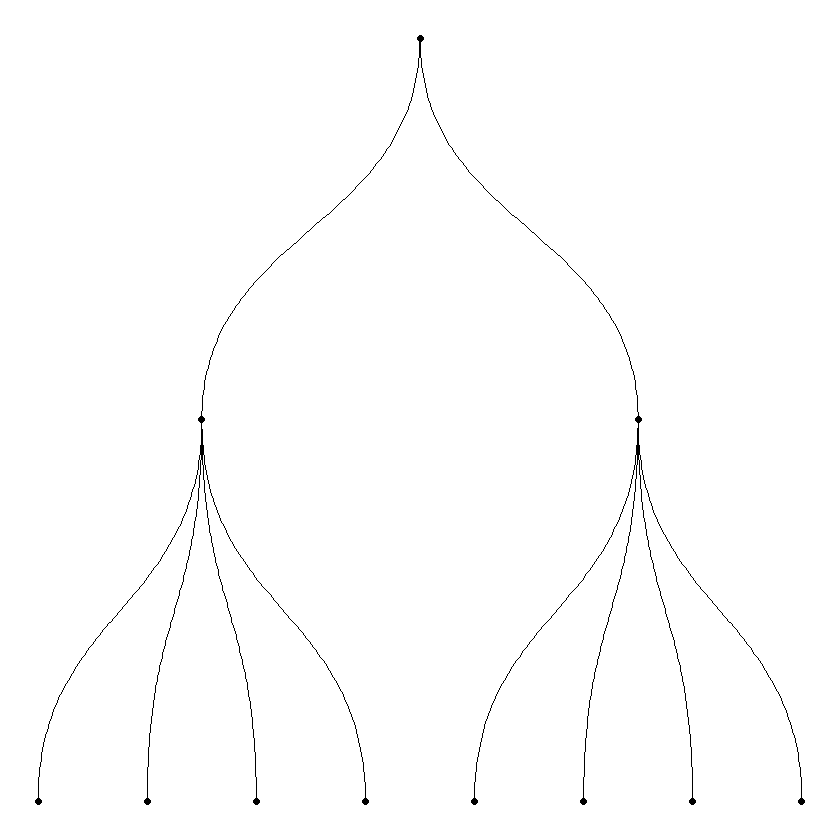

In [15]:
# libraries
library(ggraph)
library(igraph)
library(tidyverse)
 
# create a data frame 
data <- data.frame(
  level1="CEO",
  level2=c( rep("boss1",4), rep("boss2",4)),
  level3=paste0("mister_", letters[1:8])
)
 
# transform it to a edge list!
edges_level1_2 <- data %>% select(level1, level2) %>% unique %>% rename(from=level1, to=level2)
edges_level2_3 <- data %>% select(level2, level3) %>% unique %>% rename(from=level2, to=level3)
edge_list=rbind(edges_level1_2, edges_level2_3)
 
# Now we can plot that
mygraph <- graph_from_data_frame( edge_list )
ggraph(mygraph, layout = 'dendrogram', circular = FALSE) + 
  geom_edge_diagonal() +
  geom_node_point() +
  theme_void()